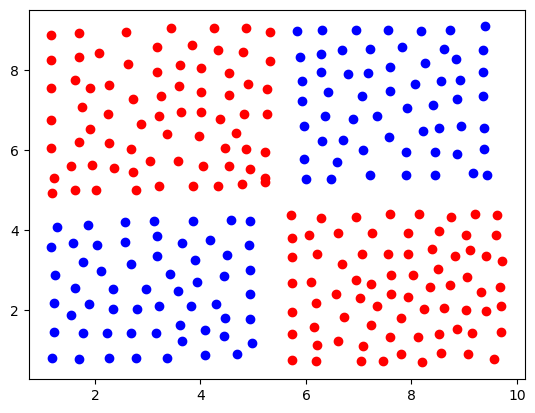

In [32]:
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

data1 = sio.loadmat('data_Week6_class1_XOR.mat')
data2 = sio.loadmat('data_Week6_class2_XOR.mat')

data1 = data1['data_Week6_class1_XOR']
data2 = data2['data_Week6_class2_XOR']


plt.scatter(data1[:,0], data1[:,1], c= 'r')
plt.scatter(data2[:,0], data2[:,1], c= 'b')
plt.show()

In [33]:
data = np.vstack((data1, data2))
#print(data)
target1 = np.ones((np.shape(data1)[0], 1))
target2 = 0*np.ones((np.shape(data2)[0], 1))
targets = np.vstack((target1, target2))
#print(data)

In [34]:
from sklearn.neural_network import MLPClassifier

# generating the grid
x1min = np.min(data[:,0])
x1max = np.max(data[:,0])
x2min = np.min(data[:,1])
x2max = np.max(data[:,1])
x1 = np.linspace(x1min, x1max, 500)
x2 = np.linspace(x2min, x2max, 500)
xx1, xx2 = np.meshgrid(x1, x2)

data_grid = np.vstack((xx1.flatten(), xx2.flatten())).T
#print(x1)

In [35]:
mlp = MLPClassifier(hidden_layer_sizes=(1, ), 
                    activation='identity',
                    max_iter=1000,
                    random_state=42)

mlp.fit(data, np.squeeze(targets.reshape(-1,1)))
prediction = mlp.predict(data_grid)

print(mlp.loss_)

0.709485304389005


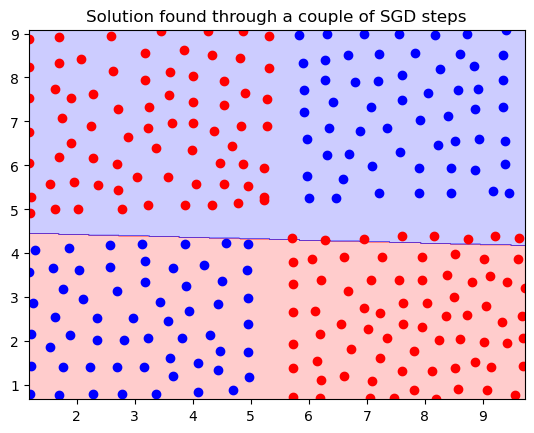

In [36]:
plt.contourf(xx1, xx2, prediction.reshape(np.shape(xx1)), \
             alpha = 0.2, cmap =cm_bright)


plt.scatter(data1[:,0], data1[:,1], c= 'r')
plt.scatter(data2[:,0], data2[:,1], c= 'b')
plt.title('Solution found through a couple of SGD steps')
plt.show()